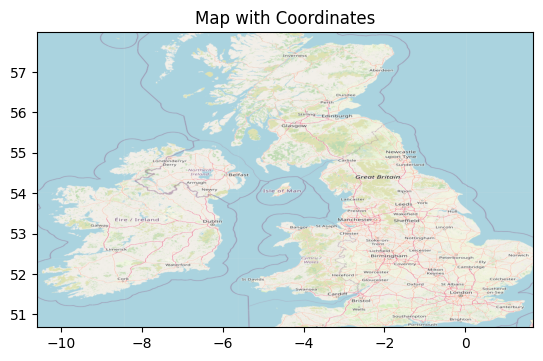

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

# to get this working as a script, the plot needs to use tcl/tk gui thing. So matplotlib needs to be told to use it; Also pip3 install tkinter ? 
# and sudo apt-get install python3-tk
#import matplotlib
#matplotlib.use('TkAgg')  # Use TkAgg as an example, but you can try other backends

def assign_coordinates(image_path):
    df = pd.read_csv('GrowLocations.csv')
    df.head()
    # Open the PNG file
    img = Image.open(image_path)
    
    shift_factor = ((-10.592, 1.6848, 50.681, 57.985))

    plt.axis(shift_factor)
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html
    
    plt.imshow(img, extent=(shift_factor))
    # https://matplotlib.org/stable/tutorials/images.html
    
    plt.title('Map of UK')
    
    """


    # Assign coordinates to specific points on the map
    # You can adjust these coordinates based on your specific map
    coordinates = {
        'Point A': (100, 200),
        'Point B': (300, 400),
        'Point C': (500, 600),
    }

    # Mark the points on the map
    for point, coord in coordinates.items():
        plt.scatter(*coord, label=point, color='red')
        plt.text(coord[0] + 10, coord[1] + 10, point, color='red')

    # Show the legend
    plt.legend()
    
    # Display the map with coordinates
    plt.show()
    """

if __name__ == "__main__":
    # Replace 'your_map.png' with the path to your PNG file
    image_path = 'map7.png'
    assign_coordinates(image_path)


In [17]:
df = pd.read_csv('GrowLocations.csv')
df.head()


,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime
0,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
1,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
2,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
3,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
4,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z


In [22]:
truncated_df = df.drop(columns= ['Serial', 'Type', 'SensorType', 'Code', 'BeginTime', 'EndTime'])
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
truncated_df.head()

,Latitude,Longitude
0,-7.923,54.98
1,-7.923,54.98
2,-7.923,54.98
3,-7.923,54.98
4,-7.923,54.98


In [28]:
# column1, column2 = list(truncated_df.columns)
df2 = truncated_df[['Longitude', 'Latitude']]
df2.head()
df3 = df[['Longitude', 'Latitude']]
df3.head()



,Longitude,Latitude
0,54.98,-7.923
1,54.98,-7.923
2,54.98,-7.923
3,54.98,-7.923
4,54.98,-7.923
